In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ProjectMajor/Emotion/dataset

/content/drive/MyDrive/ProjectMajor/Emotion/dataset


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saraswatvinay","key":"d2181a2c498a2f85d16781f2e6389580"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # to change permissions
!rm kaggle.json

In [ ]:
!kaggle datasets download -d vinaysaraswat/emotion-detection

100% 14.7M/14.7M [00:00<00:00, 53.6MB/s]
100% 14.7M/14.7M [00:00<00:00, 48.6MB/s]


In [ ]:
!unzip emotion-detection.zip

In [ ]:
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [ ]:
dataset_folder='/content/drive/MyDrive/ProjectMajor/Emotion/dataset/1.3_emotion_input_output/input/CK+48'
sub_folders=os.listdir(dataset_folder)

sub_folders

['0', '1', '2', '3', '4', '5', '6']

In [ ]:
i=0
last=[]
images=[]
labels=[]
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index

  # Define labels basis use case. We are using positive:0, negative:1, neutral:2
  # for our use case of predicting emotions of visitors entering a retail store
  if  label in [4, 6]:    # label in ['happy', 'surprise']
    new_label=0           # changed to label = positive emotion
  elif label in [0,5]:      # label in ['anger','sadness']
    new_label=1           # changed to label = negative emotion
  else:                   # label in ['contempt', 'disgust', 'fear']
    new_label=2           # changed to label = neutral emotion


  path = dataset_folder+'/'+sub_folder
  sub_folder_images= os.listdir(path)

  # reading images in the sub folder, one at a time
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(new_label))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image= cv2.resize(image,(256,256))
    images.append(image)
    labels.append(new_label)
    i+=1
last.append(i)

/content/drive/MyDrive/ProjectMajor/Emotion/dataset/1.3_emotion_input_output/input/CK+48/0/S014_003_00000030.png	1
/content/drive/MyDrive/ProjectMajor/Emotion/dataset/1.3_emotion_input_output/input/CK+48/0/S100_005_00000022.png	1
/content/drive/MyDrive/ProjectMajor/Emotion/dataset/1.3_emotion_input_output/input/CK+48/0/S028_001_00000024.png	1
/content/drive/MyDrive/ProjectMajor/Emotion/dataset/1.3_emotion_input_output/input/CK+48/0/S111_006_00000008.png	1
/content/drive/MyDrive/ProjectMajor/Emotion/dataset/1.3_emotion_input_output/input/CK+48/0/S026_003_00000013.png	1
/content/drive/MyDrive/ProjectMajor/Emotion/dataset/1.3_emotion_input_output/input/CK+48/0/S504_001_00000020.png	1
/content/drive/MyDrive/ProjectMajor/Emotion/dataset/1.3_emotion_input_output/input/CK+48/0/S502_001_00000014.png	1
/content/drive/MyDrive/ProjectMajor/Emotion/dataset/1.3_emotion_input_output/input/CK+48/0/S129_006_00000010.png	1
/content/drive/MyDrive/ProjectMajor/Emotion/dataset/1.3_emotion_input_output/inp

In [ ]:
import numpy as np

In [ ]:
images_x = np.array(images)
labels_y = np.array(labels)

# we divide image pixels by 255 to reduce computation power
# images_x = images_x/255

In [ ]:
images_x.shape

(981, 256, 256)

In [ ]:
# encoding the labels
num_of_classes = 3
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_x, labels_y_encoded,test_size=0.25, random_state=10)


In [ ]:
print(len(X_train))
print(len(Y_train))

735
735


In [ ]:
print(len(X_test))
print(len(Y_test))

246
246


In [ ]:
input = Input(shape = (256,256,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(3,activation="sigmoid")(drop_1)

In [ ]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      320       
                                                                 
 dropout_10 (Dropout)        (None, 256, 256, 32)      0         
                                                                 
 activation_8 (Activation)   (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 64)      18496     
                                                           

In [ ]:
fle_s='/content/drive/MyDrive/ProjectMajor/Emotion/dataset/output/new_emotion_model_newshape.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
save = model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=50,callbacks=[callback_list])

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

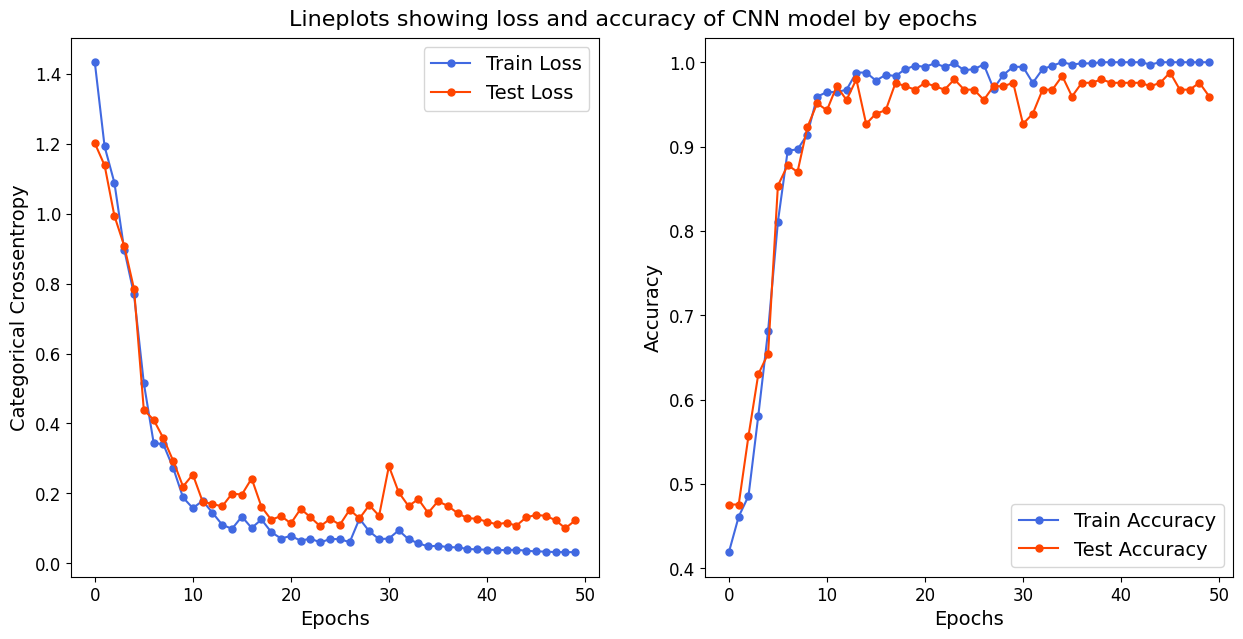

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/ProjectMajor/Emotion/dataset/output/emotion_model_newshape.h5')  # Assuming your model is saved as 'model.h5'

# Make predictions using the model
y_pred_prob = model.predict(X_test)  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

8/8 [==============================] - 23s 3s/step


In [ ]:
# print(f"Number of samples in Y_train: {Y_train.shape[0]}")
# print(f"Number of samples in y_prob: {y_prob.shape[0]}")

print(f"y_true data type: {type(Y_test)}")
print(f"y_pred data type: {type(y_prob)}")

y_true data type: <class 'numpy.ndarray'>
y_pred data type: <class 'numpy.ndarray'>


In [ ]:
# Generate confusion
from sklearn.metrics import multilabel_confusion_matrix

cm = multilabel_confusion_matrix(Y_test, y_pred)
# cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
# # Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
auc = auc(fpr, tpr)

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Emotion Detection')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/ProjectMajor/Emotion/dataset/1.3_emotion_input_output/output/emotion_model_pretrained.h5')

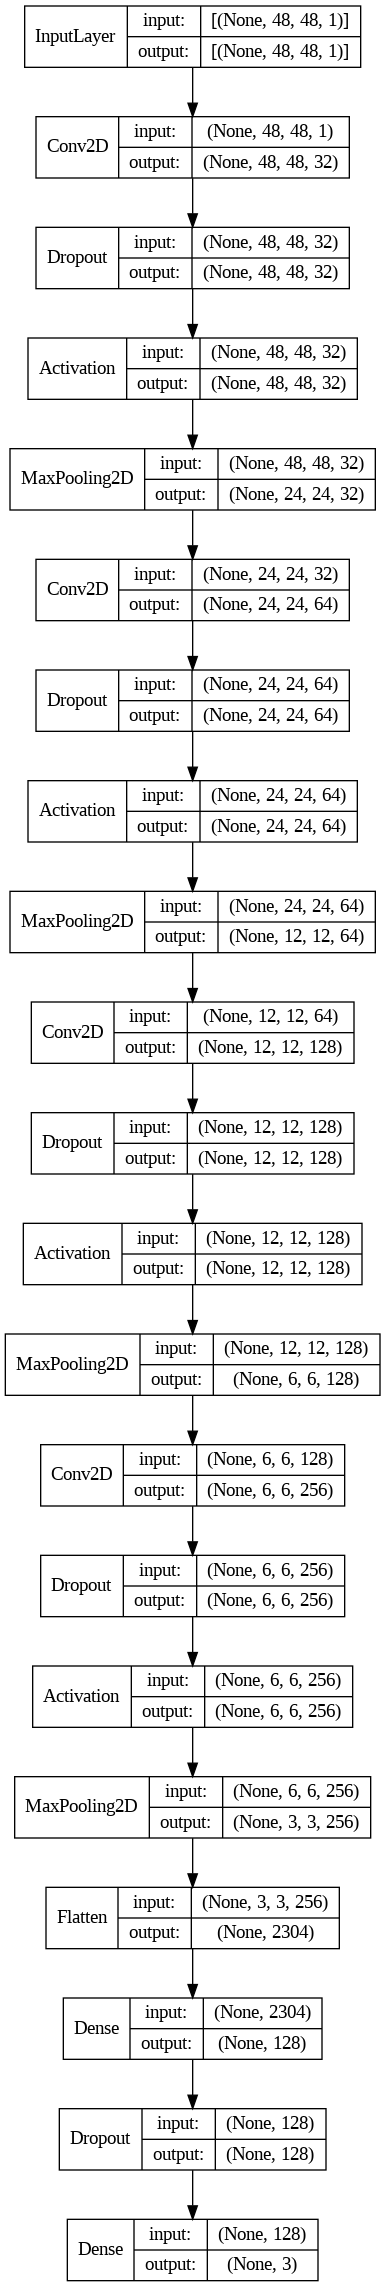

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_flowchart.png', show_shapes=True, show_layer_names=False)

In [ ]:
import shutil

# Define the path to the generated file
file_path = 'model_flowchart.png'

# Define the destination path where you want to save the file
destination_path = '/content/drive/My Drive/ProjectMajor/FlowCharts3'

# Copy the file to the destination folder
shutil.copy(file_path, destination_path)

print(f"File downloaded to: {destination_path}")